قسمت اول

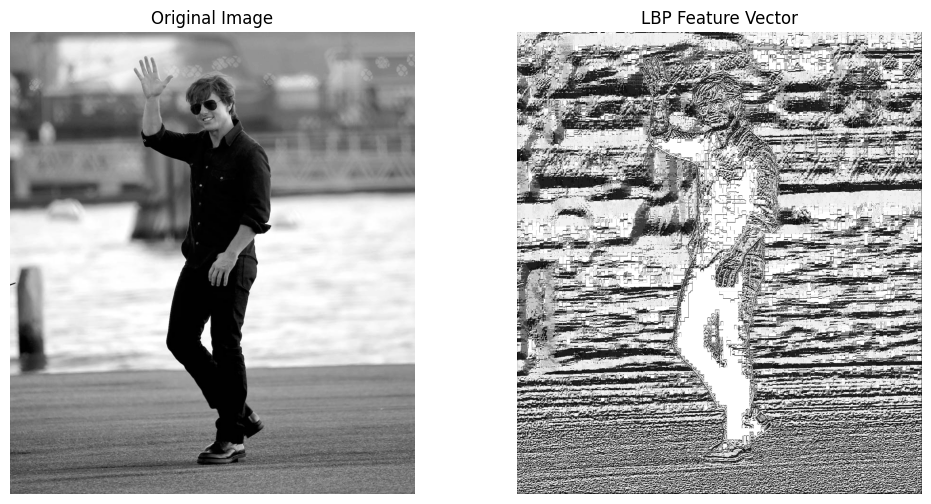

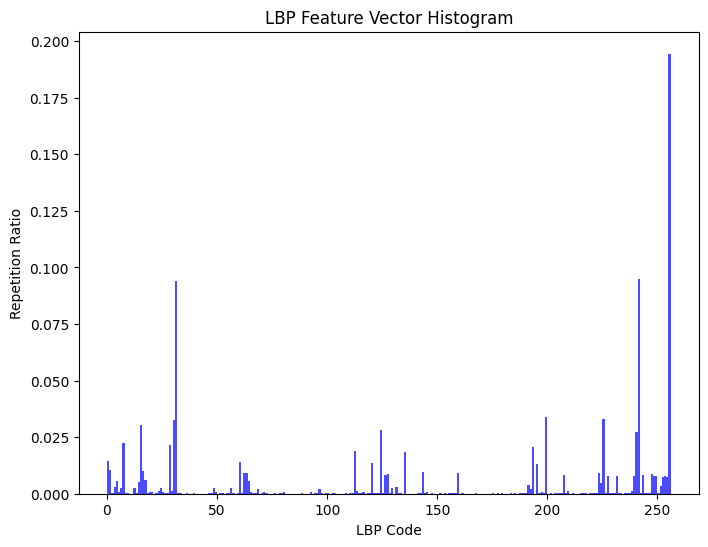

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os
from skimage import io, color
from skimage.feature import local_binary_pattern

img = cv2.imread("image.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

R = 1
P = 8
Method = 'default'

img_features = local_binary_pattern(img_gray, P=P, R=R)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(img_features, cmap='gray')
axes[1].set_title('LBP Feature Vector')
axes[1].axis('off')

plt.show()


plt.figure(figsize=(8, 6))
plt.hist(img_features.ravel(), bins=np.arange(0, np.max(img_features) + 2), density=True, color='blue', alpha=0.7)
plt.title('LBP Feature Vector Histogram')
plt.xlabel('LBP Code')
plt.ylabel('Repetition Ratio')
plt.show()

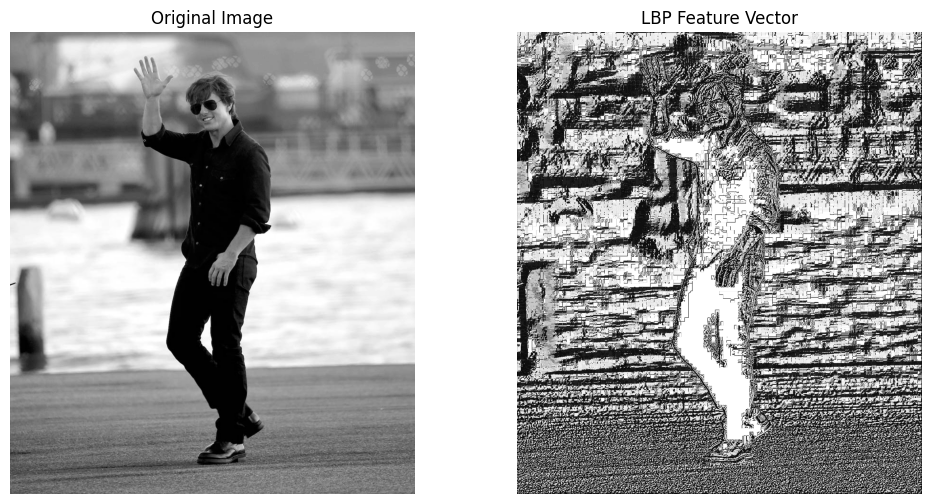

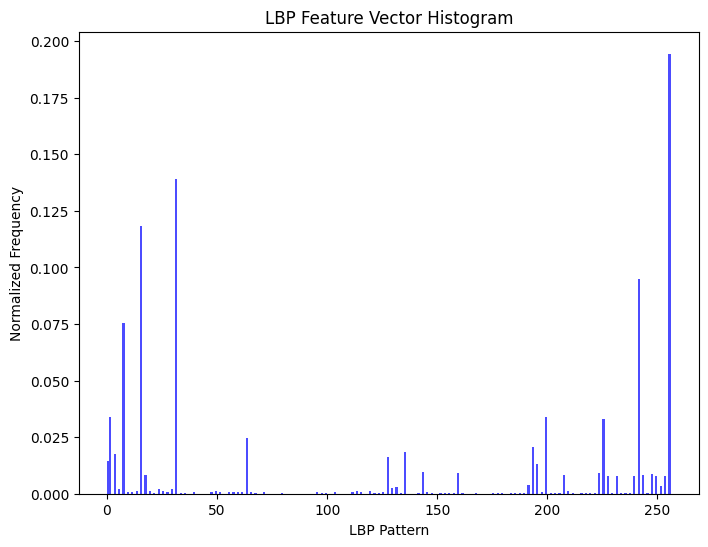

In [17]:
def Circ_Shift_feature(feature):
    feat_copy = feature
    if feat_copy == 0:
        return 0
    else:
        while feat_copy%2 != 1:
            feat_copy = feat_copy/2
        return int(feat_copy)


img_features_CIRCSH = img_features.copy()
for i in range(0, img_features.shape[0]):
    for j in range(0, img_features.shape[1]):
        img_features_CIRCSH[i][j] = Circ_Shift_feature(img_features[i][j])



fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(img_features_CIRCSH, cmap='gray')
axes[1].set_title('LBP Feature Vector')
axes[1].axis('off')

plt.show()


plt.figure(figsize=(8, 6))
plt.hist(img_features_CIRCSH.ravel(), bins=np.arange(0, np.max(img_features_CIRCSH) + 2), density=True, color='blue', alpha=0.7)
plt.title('LBP Feature Vector Histogram')
plt.xlabel('LBP Pattern')
plt.ylabel('Normalized Frequency')
plt.show()

عملیات شیفت توضیح داده شده را انجام نمیدهد. بنابراین خودمان دستی این هدف را پیاده سازی کردیم که نتیجه در هیستوگرام بالا نیز واضح است که تجمع الگو ها حول اعداد 40 و کمتر بیشتر شده است، به این معنا که برخی کد ها پس از شیفت به این اعداد تبدیل شده اند. cv2 دقت کنید که با توجه به بررسی انجام شده، تابع نوشته شده در کتابخانه 

In [18]:
img_feature_defaul      = local_binary_pattern(img_gray, P=P, R=R)
img_feature_ror         = local_binary_pattern(img_gray, P=P, R=R, method='ror')
img_feature_uniform     = local_binary_pattern(img_gray, P=P, R=R, method='uniform')
img_feature_nri_uniform = local_binary_pattern(img_gray, P=P, R=R, method='nri_uniform')

min_defaul = min(img_feature_defaul[0])
max_defaul = max(img_feature_defaul[0])
min_ror = min(img_feature_ror[0])
max_ror = max(img_feature_ror[0])
min_uniform = min(img_feature_uniform[0])
max_uniform = max(img_feature_uniform[0])
min_nri_uniform = min(img_feature_nri_uniform[0])
max_nri_uniform = max(img_feature_nri_uniform[0])

print(f'Default: [{min_defaul}, {max_defaul}]')
print(f'Ror: [{min_ror}, {max_ror}]')
print(f'Uniform: [{min_uniform}, {max_uniform}]')
print(f'Nri_Unifrom: [{min_nri_uniform}, {max_nri_uniform}]')

Default: [0.0, 241.0]
Ror: [0.0, 31.0]
Uniform: [0.0, 9.0]
Nri_Unifrom: [0.0, 58.0]


داده شده است، واضح هست هرکدوم از این حالت ها اثری بر روی وابسته شدن به چرخش، تعداد کانال تصویر، و ... میگذارد و همینطور ممکن است کد های بدست آمده را به انحاء مختلف تغییر دهد که همه این موضوعات منجر میشود که تعداد و انواع کد ها در مود های مختلف تغییر کند. برای بررسی دقیق تر توضیحات ارائه شده در لینک کفایت است و برای مختصر شدن گزارش از دوباره آوردن آن خودداری میکنیم. local_binary_pattern با توجه به لینک زیر و توضیحاتی که درمورد تابع 

https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.local_binary_pattern

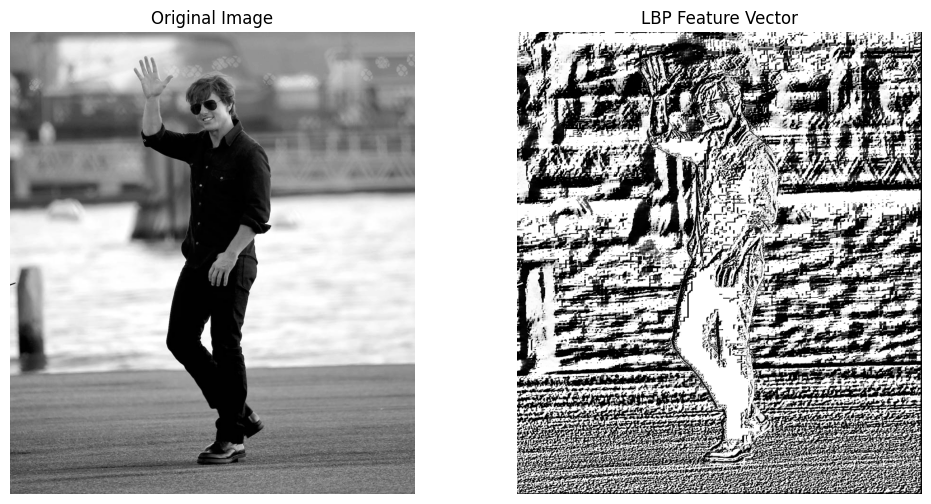

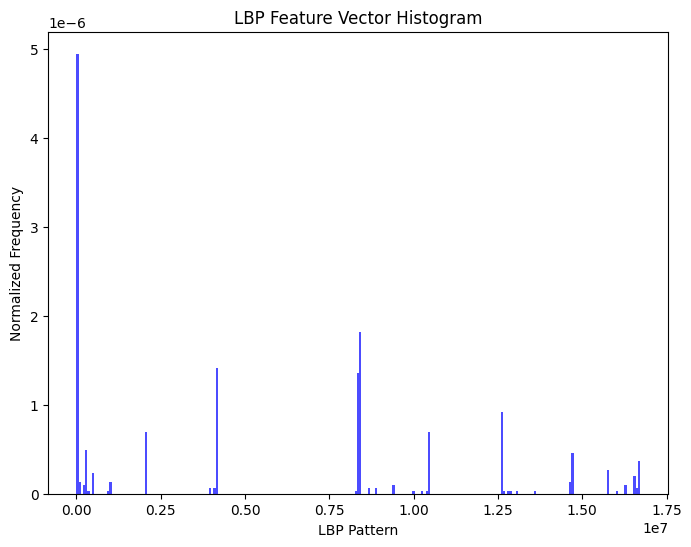

In [19]:
R = 3
P = 24
Method = 'default'

img_features = local_binary_pattern(img_gray, P=P, R=R)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(img_gray, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(img_features, cmap='gray')
axes[1].set_title('LBP Feature Vector')
axes[1].axis('off')

plt.show()


plt.figure(figsize=(8, 6))
plt.hist(img_features[0].ravel(), bins=np.arange(0, np.max(img_features[0]) + 2, 2**16), density=True, color='blue', alpha=0.7)
plt.title('LBP Feature Vector Histogram')
plt.xlabel('LBP Pattern')
plt.ylabel('Normalized Frequency')
plt.show()


R برروی وضوح قسمت هایی از بدن که در وسعت کوچک تغییر میکند اثر میگذارد. واضح است که تغییر مقدار 
برای مثال، کف دست در تصویر قبلی که این مقدار برابر با 1 بود، واضح نبود، اما با تغییر آن به عدد 3 میبینیم که تصویر کف دست واضح تر است.
را تغییر میدهیم. locallity این به این علت است که با این پارامتر میزان  

تعداد کد های بیشتر و متنوع تری تولید میشود که در هیستوگرام فوق نیز از رنج بیان شده واضح است. این میتواند به عنوان فیچر استفاده شود. P از طرف دیگر با افزایش تعداد نقاط مقایسه یا همان 

قسمت دوم

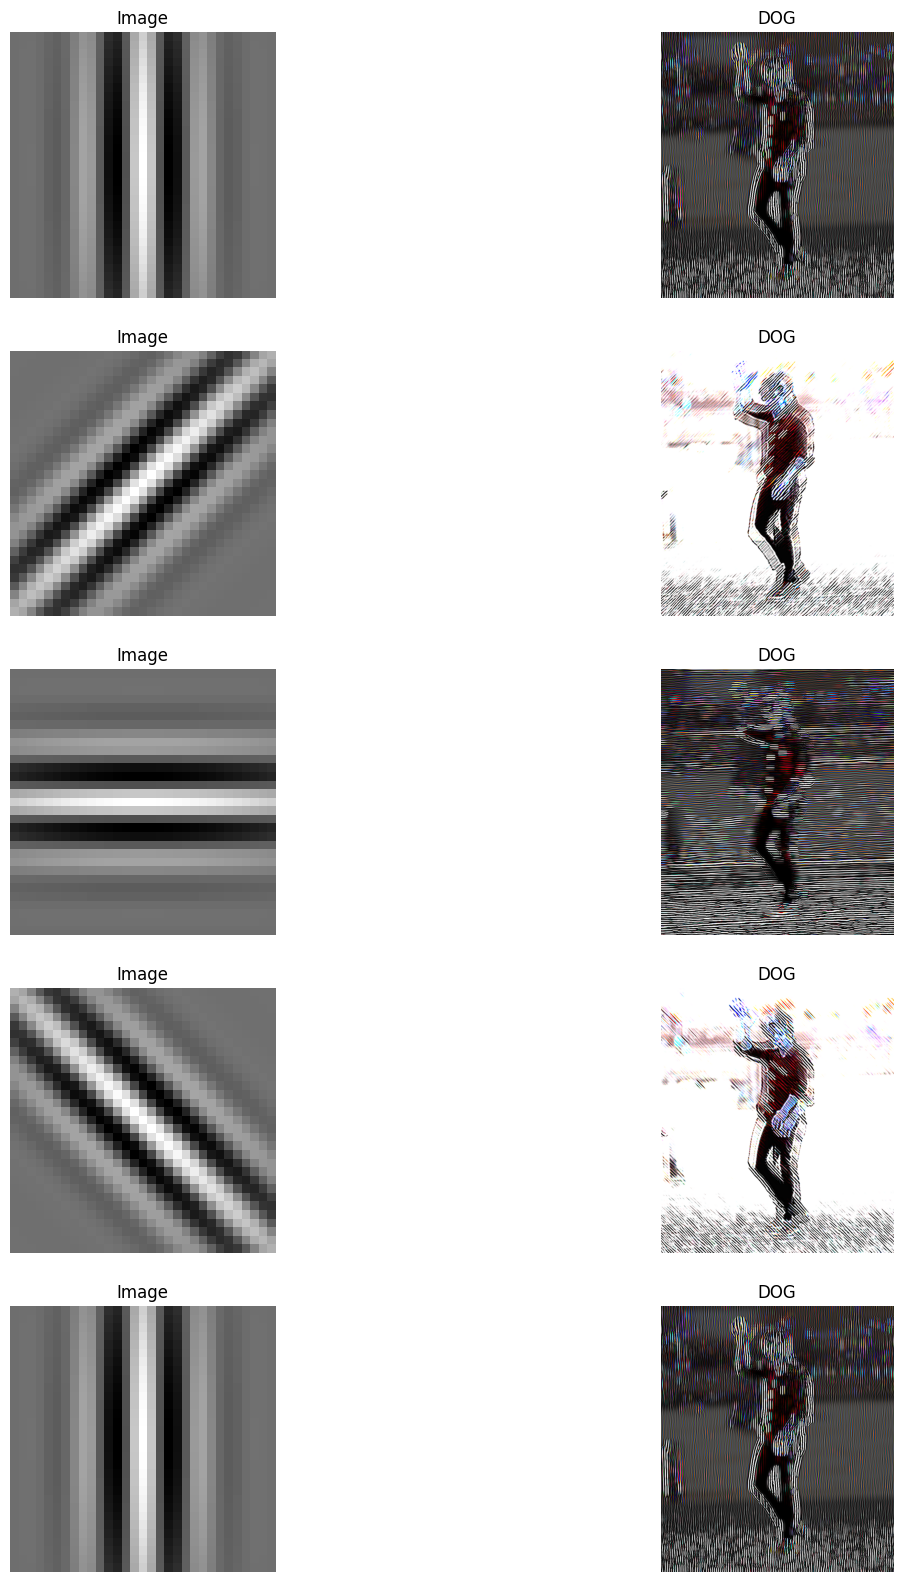

In [20]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
  
ksize = 31  
sigma = 5  
theta_range = np.arange(0, np.pi + np.pi / 4, np.pi / 4)  
lambd = 7
gamma = 0.3
frequency = 0.3  
phase = 0  
  


kernel = []
filt_imag = []
for i in range(5):
    kernel.append(cv2.getGaborKernel((ksize, ksize), sigma=sigma, theta=theta_range[i], lambd=lambd, gamma=gamma, psi=phase))
    filt_imag.append(cv2.filter2D(img, -1, kernel[i]))



plt.figure(figsize=(15, 20))
for i in range(5):
    plt.subplot(5, 2, 2*i+1)
    plt.imshow(kernel[i], cmap='gray')
    plt.title('Image')
    plt.axis('off')
    plt.subplot(5, 2, 2*i+2)
    plt.imshow(filt_imag[i], cmap='gray')
    plt.title('DOG')
    plt.axis('off')


plt.show()

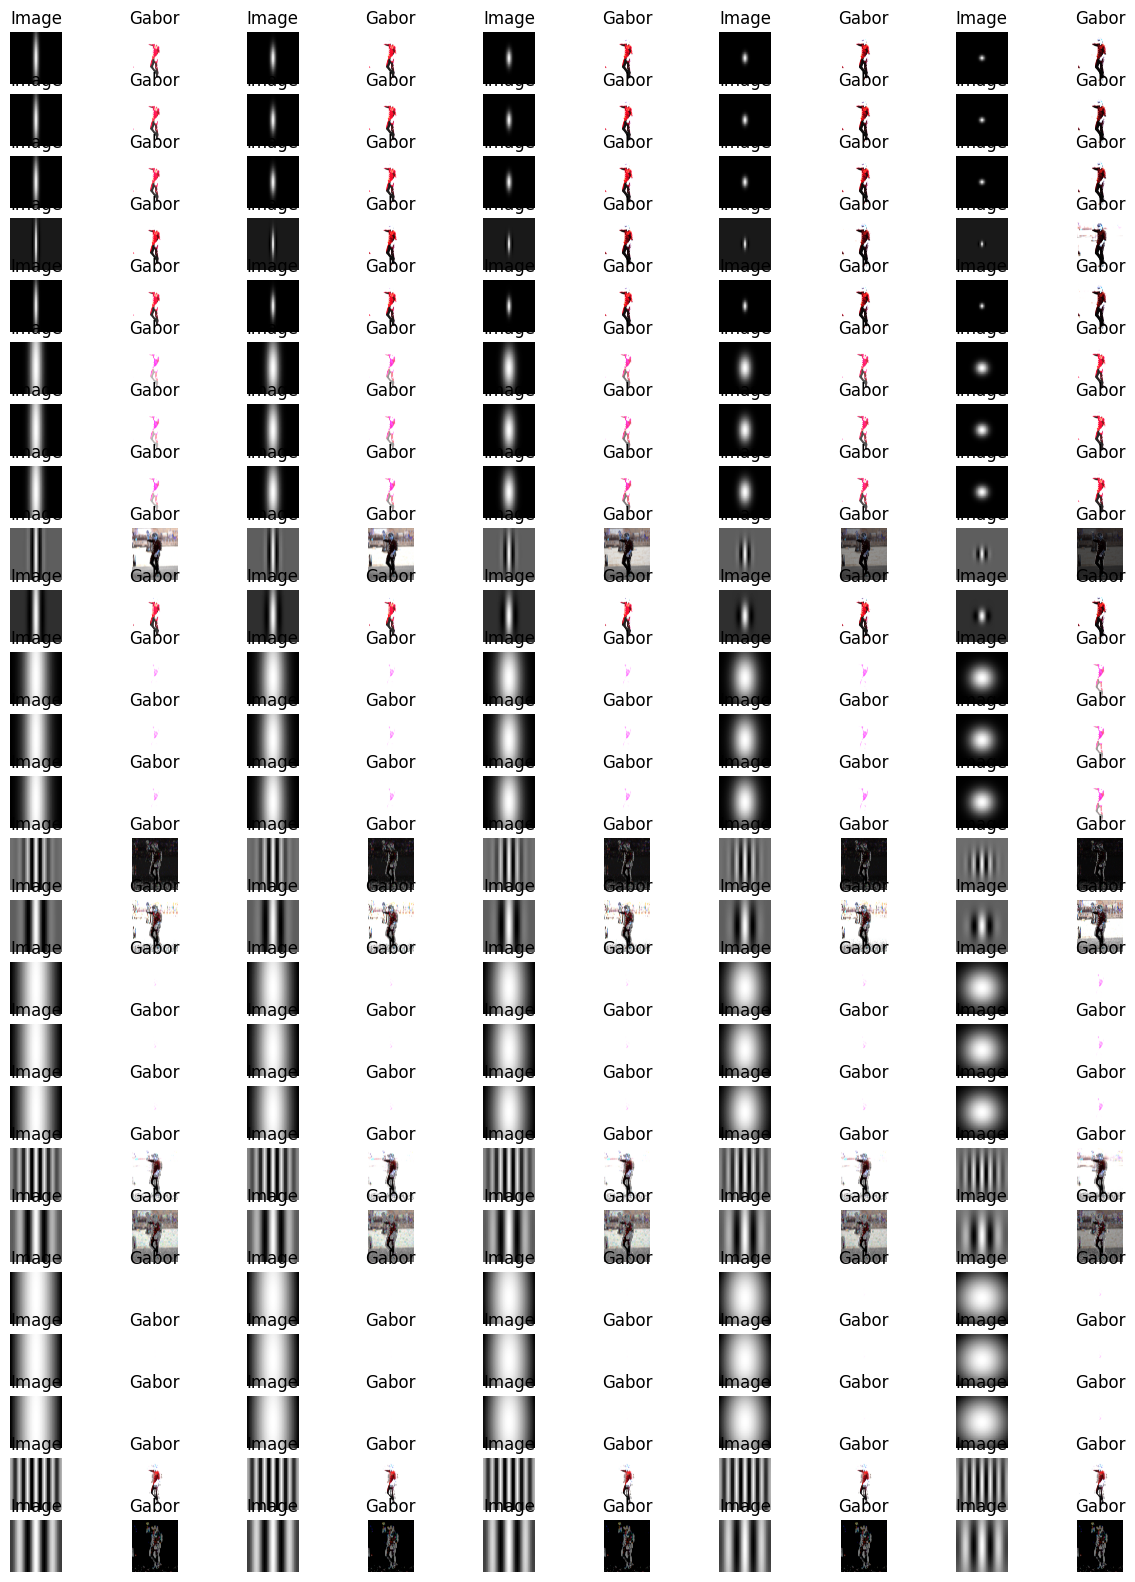

In [21]:
ksize = 31  
sigma = [1, 2.5, 5, 8, 12]  
theta_range = np.pi
lambd = [0.1, 0.5, 1, 5, 10]
gamma = [0.1, 0.2, 0.3, 0.5, 1]
frequency = 0.3  
phase = 0  
  


kernel = []
filt_imag = []
for i in range(5):
    for j in range(5):
        for k in range(5):
            k = cv2.getGaborKernel((ksize, ksize), sigma=sigma[i], theta=theta_range, lambd=lambd[j], gamma=gamma[k], psi=phase)
            kernel.append(k)
            filt_imag.append(cv2.filter2D(img, -1, k))



plt.figure(figsize=(15, 20))
for i in range(125):
    plt.subplot(25, 10, 2*i+1)
    plt.imshow(kernel[i], cmap='gray')
    plt.title('Image')
    plt.axis('off')
    plt.subplot(25, 10, 2*i+2)
    plt.imshow(filt_imag[i], cmap='gray')
    plt.title('Gabor')
    plt.axis('off')


plt.show()

در مجموع با بررسی دو تصویر فوق، واضح است که:

تغییر سیگما، چون منجر به کشیدگی یا تجمع توزیع گوسی میشود، منجر به میزان پخش شدگی فیلتر در دو بعد میشود. هرچقدر این مقدار بیشتر باشد تمرکز و تجمع در مرکز و هرچقدر کمتر باشد پهن شدگی بیشتر است.

با تغییر تتا میتوانیم استخراج فیچر ها (مانند لبه یا هر ویژگی دیگری) در راستای دلخواه انجام دهیم. خود فیلتر هم واضح است به صورت زاویه دار تشکیل میشود.

با تغییر فرکانس سینوسی این تغییرات در راستای زاویه سریعتر یا کند تر میشود (منظور از فرکانس همان وارون لاندا است)

را در یک جهت تغییر دهد که این اتفاق در سطر اول تصاویر فوق قابل دیدن است. جایی که کشیدگی قسمت سفید فیلتر با تغییر گاما از حالت بیضوی به حالت دایروی تغییر کرده است. aspect ratio قرار دارد و میتواند  y^2 همینطور در رابطه اصلی، پارامتر گاما پشت عبارت 

بخش سوم


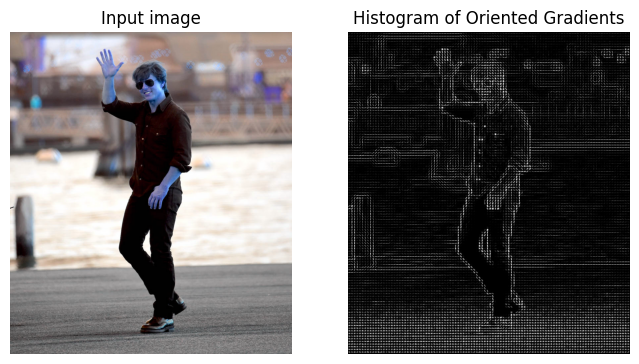

In [22]:

from skimage.feature import hog
from skimage import exposure


fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, channel_axis=-1)

plt.figure(figsize=(8, 16))

plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(img, cmap=plt.cm.gray)
plt.title('Input image')

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(hog_image_rescaled, cmap=plt.cm.gray)
plt.title('Histogram of Oriented Gradients')
plt.show()

طی تجربه و تغییر، تغییرات جزئی تعداد بین ها تاثیر چندانی ندارد، اما با تغییر پارامتر هایی که به تعداد پیکسل چه در بلوک چه در سلول ربط پیدا میکند،
میتوان رزولوشن تصویر گرادیان یا همان هیستوگرام فیچر را بالا برد. دقت کنید که ما بازای آن بزرگ شدن سایز آرایه فیچر هاست.

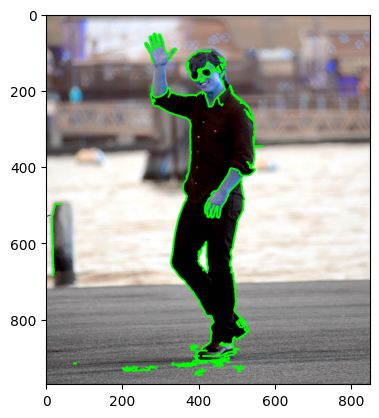

In [29]:

contours, hierarchy = cv2.findContours(hog_image_rescaled.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


contours_len_based = list(map(lambda x:len(x),contours))
index_top_contours = sorted(contours_len_based, reverse=True)[:25]
top_max_indexes = [contours_len_based.index(value) for  value in index_top_contours]
person_position_contours = [contours[i] for i in top_max_indexes]

cv2.drawContours(img, person_position_contours, -1, (0, 255, 0), 3) 
plt.imshow(img)

با کمک کانتور و البته خلاقیت، و هاگ بدست آمده در قسمت قبل، محل حضور شخص در تصویر را به صورت دقیق پیدا کردیم

In [40]:
import random
from sklearn.preprocessing import StandardScaler 


happy_path = "../Lab1/Cohn-Kanade/happy/"
disgust_path = "../Lab1/Cohn-Kanade/disgust/"

happy_imgs = []
disgust_imgs = []

images = os.listdir(happy_path)
for img_num, img in enumerate(images):
    happy_imgs.append(cv2.cvtColor(cv2.imread(happy_path + '/' + img), cv2.COLOR_BGR2GRAY))

images = os.listdir(disgust_path)
for img_num, img in enumerate(images):
    disgust_imgs.append(cv2.cvtColor(cv2.imread(disgust_path + '/' + img), cv2.COLOR_BGR2GRAY))

random.shuffle(disgust_imgs)
random.shuffle(happy_imgs)


X_train = disgust_imgs[:35] + happy_imgs[:65]
X_test = disgust_imgs[35:] + happy_imgs[65:]
y_train = [0] * 35 + [1] * 65
y_test = [0] * (len(disgust_imgs)-35) + [1] * (len(happy_imgs)-65)


CropAndResize = lambda img: img[100:480:1, 25:275:1]

X_train_cropped = list(map(CropAndResize, X_train))
X_test_cropped = list(map(CropAndResize, X_test))


scaler = StandardScaler()
X_train_cropped_transform = [scaler.fit_transform(image) for image in X_train_cropped]
X_test_cropped_transform = [scaler.fit_transform(image) for image in X_test_cropped]

داده ها را خوانده، شافل و به تست و ترین تقسیم کرده، ماسک را اعمال کرده و اسکیل کرده ایم

In [41]:
def extract_hog_features(image):
    features, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), visualize=True)
    return hog_image

features_train = [extract_hog_features(image) for image in X_train_cropped_transform]



In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


classifier = SVC(kernel='linear', C=10)  

features_train_flat = [feat.reshape(-1).T for feat in features_train]
classifier.fit(features_train_flat, y_train)

features_test = [extract_hog_features(image) for image in X_test_cropped_transform]
features_test_falt = [feat.reshape(-1).T for feat in features_test]

predictions = classifier.predict(features_test_falt)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 1.0


دقت صد در صد حاصل شده است! بنابراین نیازی به گریدسرچ نیست. C با یک مقدار تیپیکال برای 

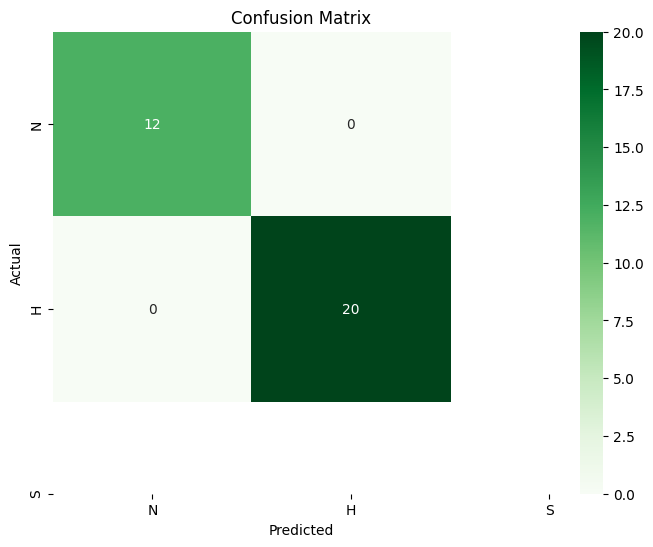

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens', xticklabels="NHS", yticklabels="NHS")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

از این ماتریس کانفیوژن نیز مشخص است که هر دو دسته کاملا درست و بدون خطا پیش بینی شده اند.